<a href="https://colab.research.google.com/github/YanaSemenenya/INTERPRETATOR/blob/develop/Examples/BaseInterpretator_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Модель для интепретации

In [1]:
import xgboost as xgb
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import roc_auc_score

In [2]:
cancer = load_breast_cancer()

X = pd.DataFrame(cancer.data, columns = cancer.feature_names)
y = cancer.target

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="auc", 
                              max_depth=4,learning_rate=0.277, gamma=0.382)
_ = xgb_model.fit(X, y)

# Интерпретация модели

In [5]:
## Установка необходимых библиотек
#! pip install git+https://github.com/oracle/Skater.git@master
#! pip install git+https://github.com/YanaSemenenya/INTERPRETATOR.git@develop
#! pip uninstall yanapy

## Инициализация интерпретатора

In [6]:
from yanapy.interpretators.baseinterpretator import BaseInterpretator

In [7]:
my_interpret = BaseInterpretator(xgb_model)

## SHAP

In [8]:
my_interpret.fit_shap()

### summary_plot
TODO: написать для чего нужен график

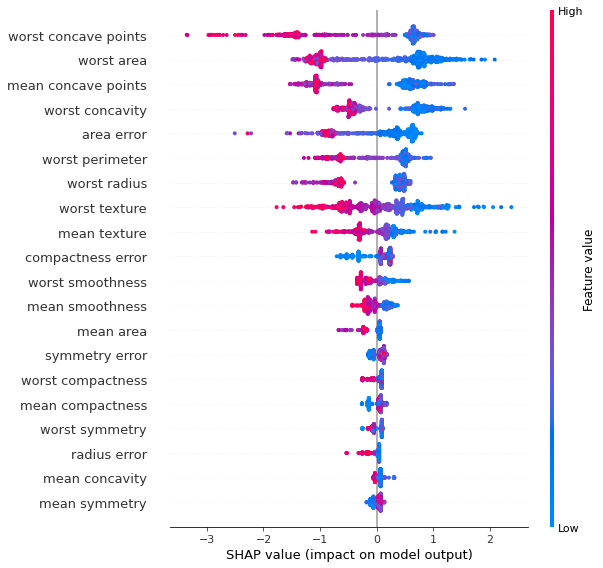

In [9]:
my_interpret.shap(X, type = "summary_plot")

### summary_bar_plot
TODO: написать для чего нужен график

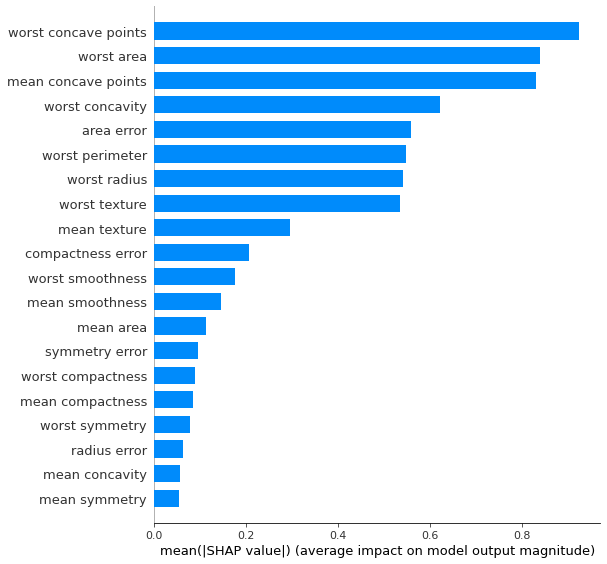

In [10]:
my_interpret.shap(X, type = "summary_bar_plot")

### individual_plot
TODO: написать для чего нужен график

In [11]:
my_interpret.shap(X, type = "individual_plot")

## PDP 

In [12]:
my_interpret.fit_pdp(X)

2021-05-09 13:25:34,894 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[100/100] grid cells ████████████████████ Time elapsed: 11 seconds

[[<Figure size 1152x720 with 2 Axes>,

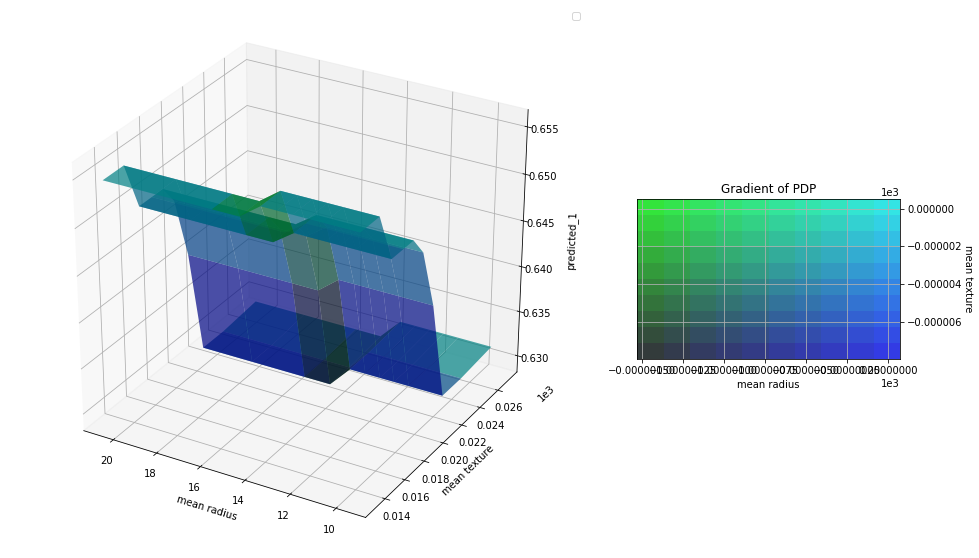

In [13]:
my_interpret.pdp(('mean radius', 'mean texture'), n_samples=100, grid_resolution=10)

2021-05-09 13:26:00,132 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[10/10] grid cells ████████████████████ Time elapsed: 0 seconds

[[<Figure size 1152x720 with 1 Axes>,

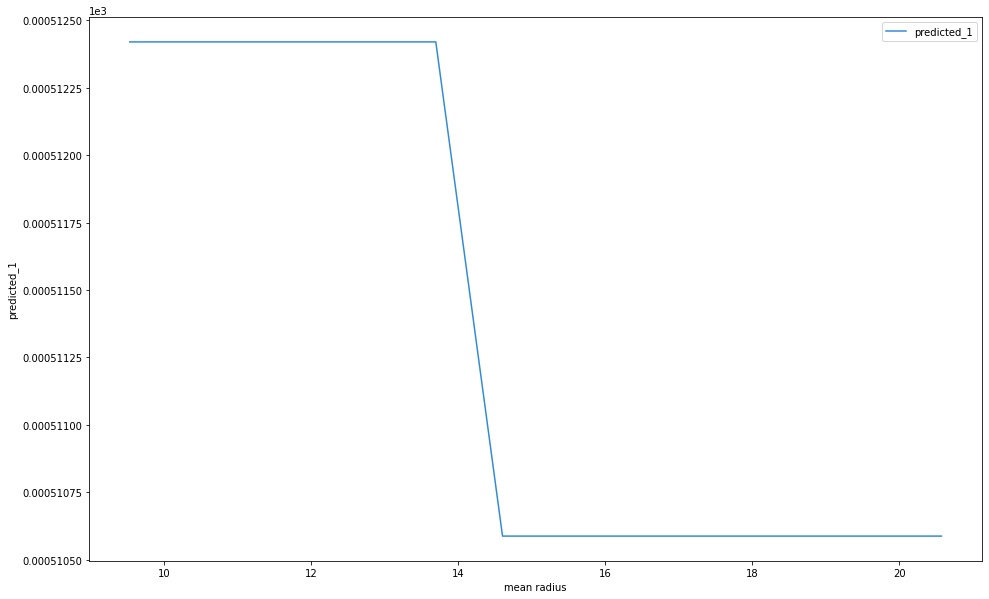

In [14]:
my_interpret.pdp(('mean radius'), n_samples=100, grid_resolution=10)